# S&P500 Ergodicity
S&P500 is not ergodic. Let's verify this.

If it was ergodic then we would have `Arithmetic Average Return` = `Geometric Average Return`

## Context
Ergodicity applies when arithmetic mean is the same as geometric mean:
* __Arithmetic Mean__: $\sum_{i=1}^n \frac{x_i}{n}$
    * This is what people usually mean by "average"
    * Sometimes called ensemble average
* __Geometric Mean__ is the time average: $\sqrt[n]{\prod_{i=1}^n x_i}$
    * This reflects how a real portfolio grows or shrinks over time.
    * In finance it's often called Compound Annual Growth Rate (CAGR)

In [1]:
import numpy as np
import pandas as pd

# Prepare Data
Datasource [Berkshire Hathaway via Business Insider](https://www.businessinsider.com/personal-finance/average-stock-market-return)

In [2]:
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
return_pct =[15.1, 2.1, 16, 32.4, 13.7, 1.4, 12, 21.8, -4.4, 31.5]
d = {'year':year,'return_pct':return_pct}
df = pd.DataFrame(d)
df = df.set_index('year')

In [3]:
df['return_multiple'] = 1 + df.return_pct/100

# Calculate Return

Let's say we invest $100 at the beginning of 2020:

In [4]:
initial_value = 100
df['investment_value'] = df.return_multiple.cumprod()*initial_value

The `investment_value` column below shows how $100 grows at the reported rates of return:

In [5]:
df

,return_pct,return_multiple,investment_value
year,,,
2010,15.1,1.151,115.100000
2011,2.1,1.021,117.517100
2012,16.0,1.160,136.319836
2013,32.4,1.324,180.487463
2014,13.7,1.137,205.214245
2015,1.4,1.014,208.087245
2016,12.0,1.120,233.057714
2017,21.8,1.218,283.864296
2018,-4.4,0.956,271.374267


### Calculate Average Return

In [6]:
# Calculate Arithmetic Mean
arithmetic_mean = df.return_pct.mean()/100

In [7]:
# Calculate Geometric Mean
final_value = df.investment_value.iloc[-1]
years = len(df)
geometric_mean = (final_value/initial_value)**(1/years)-1

In [8]:
print("Average Yearly Return:")
print("* Arithmetic:"+" {0:.2%}".format(arithmetic_mean))
print("* Geometric :"+" {0:.2%}".format(geometric_mean))

Average Yearly Return:
* Arithmetic: 14.16%
* Geometric : 13.57%


# Mock up "Constant Return" equivalents

Mock up the intermediate years supposing returns were constantly at the period's average rate.

In [9]:
df['arithmetic_mean'] = arithmetic_mean
df['arithmetic_mean_growth'] = (1+df.arithmetic_mean).cumprod()*initial_value

In [10]:
df['geometric_mean'] = geometric_mean
df['geometric_mean_growth'] = (1+df.geometric_mean).cumprod()*initial_value

In [11]:
value_df = df.loc[:,['investment_value','arithmetic_mean_growth','geometric_mean_growth']]
value_df

,investment_value,arithmetic_mean_growth,geometric_mean_growth
year,,,
2010,115.100000,114.160000,113.566291
2011,117.517100,130.325056,128.973024
2012,136.319836,148.779084,146.469880
2013,180.487463,169.846202,166.340410
2014,205.214245,193.896424,188.906633
2015,208.087245,221.352158,214.534256
2016,233.057714,252.695624,243.638598
2017,283.864296,288.477324,276.691318
2018,271.374267,329.325713,314.228067


# Plot

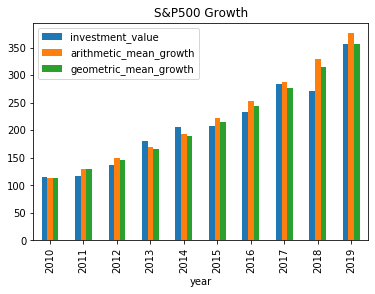

In [12]:
value_df.plot(kind='bar', title='S&P500 Growth')

# Conclusion
S&P500 Investors care about Geometric Average return.
* Arithmetic return  will always be higher than Geometric Average due to Jensen's inequality.
* This is what people mean when they say 
    * "Average Return is unatainable"
    * "S&P500 returns are not ergodic"

# Further Reading
Without proper explanation:
* Arithmetic Average Return >= Geometric Average Return
* Some call this a 'volatility tax'
    * Because if returns are constant: Arithmetic=Geometric
    * But when returns have volatility: Arithmetic>Geometric

##### Convex Functions:
The difference between Arithmetic and Geometric Average comes down to Jenson's inequality:
* $ f(t x_1 + (1-t) x_2) \leq t f(x_1) + (1-t) f(x_2) $ if $f$ is a convex function
* i.e. function of average < average of function
* Volatility raises the value of convex functions

### Programatic Interpretation

Thinking about this like a programmer, Arithmetic and Geometric mean differ in how the aggregation is done.

In [13]:
def return_ratio(start_value, end_value):
    return (end_value/start_value)

##### Geometric Mean from Value

In [14]:
initial_value = 100
final_value = df.investment_value.iloc[-1]

In [15]:
# Apply return_ratio to overall return and take the nth root
return_ratio(initial_value,final_value)**(1/10) == geometric_mean + 1

True

##### Arithmetic Mean from Value

In [16]:
end_of_year_values = df.investment_value
start_of_year_values = df.investment_value.shift(fill_value=initial_value)

In [17]:
# Apply return_ratio for each year and take the average

return_ratios = [return_ratio(start_value, end_value) for start_value, end_value in zip(start_of_year_values, end_of_year_values)]

np.mean(return_ratios) == arithmetic_mean+1

True